# Creating graphs for Titanic data

First set up  the directory with the data

In [299]:
#%matplotlib notebook
%matplotlib inline

import csv as csv
import numpy as np
import plotly
import  matplotlib.mlab  as mlab
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

my_project_dir = "C:\\Users\Johnny\Documents\GitHub\Titanic\kaggle_data\\"


Load and preview the data

In [300]:
csv_file_object = csv.reader(open(my_project_dir + 'train.csv', 'r'))       # Load in the csv file
header = next(csv_file_object)                     # Skip the fist line as it is a header
data=[]                                            # Create a variable to hold the data

for row in csv_file_object:                        # Skip through each row in the csv file,
    data.append(row[0:])                           # adding each row to the data variable
    

data = np.array(data)                              # importing data as np array
print (header[:])
print (data[0:2,:])


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
[['1' '0' '3' 'Braund, Mr. Owen Harris' 'male' '22' '1' '0' 'A/5 21171'
  '7.25' '' 'S']
 ['2' '1' '1' 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
  'female' '38' '1' '0' 'PC 17599' '71.2833' 'C85' 'C']]


In [301]:
def sum_groups (arr_groups,arr_data):
    unique_groups = np.unique(arr_groups)
    arr_sums = []
    for group in unique_groups:
        arr_sums.append(arr_data[arr_groups == group].sum())
    
    return unique_groups,arr_sums

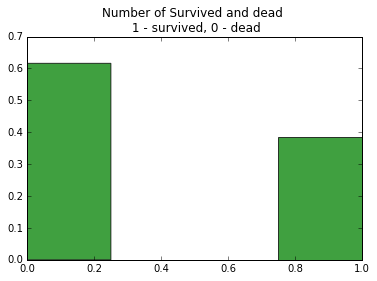

In [444]:
X = data[:,1].astype(np.float)

X_weights = np.ones_like(X)/float(len(X))   


n, bins, patches = plt.hist(X, 4, weights = X_weights,  facecolor='g', alpha=0.75)
plt.title('Number of Survived and dead \n 1 - survived, 0 - dead')
plt.show()

#print (n,bins, patches[:])



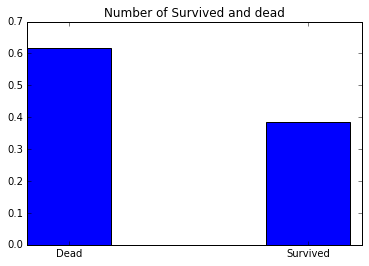

In [303]:
# Selecting data
y_class = data[:,1].astype(np.integer)
X = np.ones_like(y)
y_groups, X_data = sum_groups (y_class, X)
X_data = X_data/sum(X_data)
#print ([X_data[0]],X_data[1])

# Plotting the data
width = 0.35
ind = np.arange(len(y_groups))

fig, ax = plt.subplots()
ax.bar(ind,X_data, width)
pl.xticks(ind + width/2,['Dead', 'Survived'])
plt.title('Number of Survived and dead')
pl.show()


#rects1 = plt.bar(index, means_men)

#data2 = [[np.random.rand(100)] for i in range(3)]
#pl.boxplot(data2)
#pl.xticks([1, 2, 3], ['mon', 'tue', 'wed'])
#pl.show()

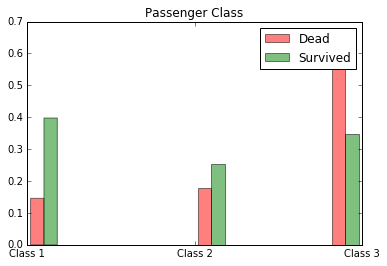

In [304]:
# passenger class
X = data[:,2].astype(np.float)
y_class = data[:,1].astype(np.integer)

X_weights = []
for d_class in np.unique(y_class):
    ones_group = np.ones_like(X[y_class==d_class])
    X_weights.append(ones_group/len(X[y_class==d_class]))

#print (X_weights)
width = 0.15
ind = np.arange(len(np.unique(X)))+1

plt.title('Passenger Class')
plt.hist((X[y_class==0],X[y_class==1]),
         color=("r","g"), 
         weights= X_weights, 
         alpha=0.5, 
         label = ("Dead","Survived"))

plt.xticks(ind,['Class 1', 'Class 2','Class 3'])


#plt.hist(,color="g", alpha=0.5, stacked=True, label = "Survived")
plt.legend(loc='upper right')

In [326]:
# names
X = data[:,3]
y_class = data[:,1].astype(np.integer)

t_d = np.array(list(zip(X, y_class)))
print (t_d[1:10])


[['Cumings, Mrs. John Bradley (Florence Briggs Thayer)' '1']
 ['Heikkinen, Miss. Laina' '1']
 ['Futrelle, Mrs. Jacques Heath (Lily May Peel)' '1']
 ['Allen, Mr. William Henry' '0']
 ['Moran, Mr. James' '0']
 ['McCarthy, Mr. Timothy J' '0']
 ['Palsson, Master. Gosta Leonard' '0']
 ['Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)' '1']
 ['Nasser, Mrs. Nicholas (Adele Achem)' '1']]


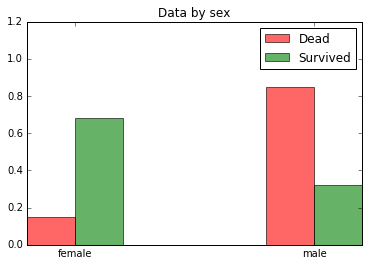

In [405]:
# sex
X = data[:,4]
X_ones = np.ones_like(X)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'

plot_data=[]
for my_class in np.unique(y_names):
    
    sum_my = len(X[y_names==my_class])  # sum of my classes
    
    for mx_class in np.unique (X):
        condit = np.logical_and(X==mx_class, y_names==my_class)
        x_weights = round(len(X[condit])/sum_my,2)
        plot_data.append ([my_class,mx_class,x_weights])

plot_data = np.array(plot_data)
plot_data[:,2] = plot_data[:,2].astype(float)
#print (plot_data)

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in np.unique(y_names):
    pl_data = plot_data[plot_data[:,0]==my_class,2].astype(float)
    #print (pl_data)
    ind = np.arange(len(np.unique(X)))
    plt.bar(ind+i_ind*width,pl_data, width, alpha = 0.6, color = col_arr[i_ind], label = my_class)
    i_ind = i_ind + 1

plt.legend(loc='upper right')
plt.ylim ([0,1.2])
ind = np.arange(len(np.unique(X)))
plt.xticks(ind+width,np.unique(X))
plt.title ("Data by sex")
plt.show()

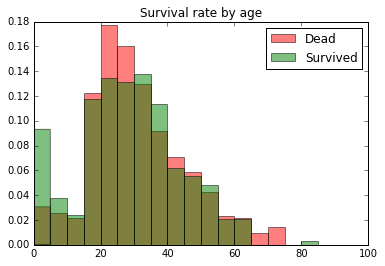

In [435]:
# age
X = data[:,5]
X[X==""] = 0
X_weights = np.ones_like(X).astype(float)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'
y_names[X=='0'] = 'not defined'

for my_class in np.unique(y_names):
   X_weights[y_names == my_class] = 1/sum(y_names == my_class)

#print (X[y_names == 'Survived'])

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in ("Dead","Survived"):
    pl_data = X[y_names==my_class].astype(float)
    pl_weight = X_weights[y_names==my_class].astype(float)
    #print (pl_data)
    #ind = np.arange(len(np.unique(X)))
    plt.hist(pl_data,
             bins = 20,
             range = [0,100],
             weights = pl_weight,
             alpha = 0.5,
             label = my_class,
             color = col_arr[i_ind])
    

    i_ind = i_ind + 1

    
plt.legend(loc='upper right')
plt.title ("Survival rate by age")
plt.show()

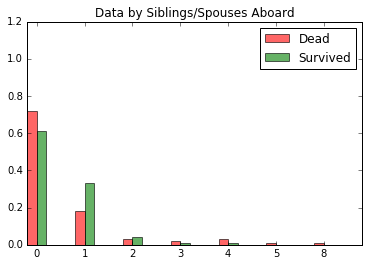

In [440]:
# Number of Siblings
X = data[:,6]
X_ones = np.ones_like(X)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'

plot_data=[]
for my_class in np.unique(y_names):
    
    sum_my = len(X[y_names==my_class])  # sum of my classes
    
    for mx_class in np.unique (X):
        condit = np.logical_and(X==mx_class, y_names==my_class)
        x_weights = round(len(X[condit])/sum_my,2)
        plot_data.append ([my_class,mx_class,x_weights])

plot_data = np.array(plot_data)
plot_data[:,2] = plot_data[:,2].astype(float)
#print (plot_data)

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in np.unique(y_names):
    pl_data = plot_data[plot_data[:,0]==my_class,2].astype(float)
    #print (pl_data)
    ind = np.arange(len(np.unique(X)))
    plt.bar(ind+i_ind*width,pl_data, width, alpha = 0.6, color = col_arr[i_ind], label = my_class)
    i_ind = i_ind + 1

plt.legend(loc='upper right')
plt.ylim ([0,1.2])
ind = np.arange(len(np.unique(X)))
plt.xticks(ind+width,np.unique(X))
plt.title ("Data by Siblings/Spouses Aboard")
plt.show()

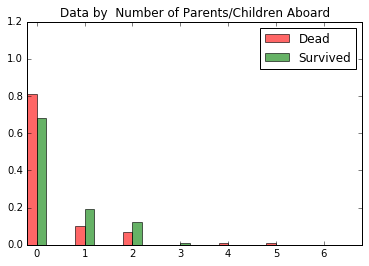

In [442]:
#  Number of Parents/Children Aboard
X = data[:,7]
X_ones = np.ones_like(X)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'

plot_data=[]
for my_class in np.unique(y_names):
    
    sum_my = len(X[y_names==my_class])  # sum of my classes
    
    for mx_class in np.unique (X):
        condit = np.logical_and(X==mx_class, y_names==my_class)
        x_weights = round(len(X[condit])/sum_my,2)
        plot_data.append ([my_class,mx_class,x_weights])

plot_data = np.array(plot_data)
plot_data[:,2] = plot_data[:,2].astype(float)
#print (plot_data)

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in np.unique(y_names):
    pl_data = plot_data[plot_data[:,0]==my_class,2].astype(float)
    #print (pl_data)
    ind = np.arange(len(np.unique(X)))
    plt.bar(ind+i_ind*width,pl_data, width, alpha = 0.6, color = col_arr[i_ind], label = my_class)
    i_ind = i_ind + 1

plt.legend(loc='upper right')
plt.ylim ([0,1.2])
ind = np.arange(len(np.unique(X)))
plt.xticks(ind+width,np.unique(X))
plt.title ("Data by  Number of Parents/Children Aboard")
plt.show()


In [447]:
# names
X = data[:,8]
y_class = data[:,1].astype(np.integer)

t_d = np.array(list(zip(X, y_class)))
print (t_d[1:10])

[['PC 17599' '1']
 ['STON/O2. 3101282' '1']
 ['113803' '1']
 ['373450' '0']
 ['330877' '0']
 ['17463' '0']
 ['349909' '0']
 ['347742' '1']
 ['237736' '1']]


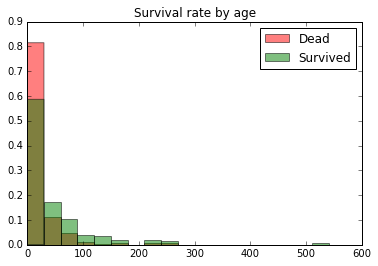

In [449]:
# age
X = data[:,9]
X[X==""] = 0
X_weights = np.ones_like(X).astype(float)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'
y_names[X=='0'] = 'not defined'

for my_class in np.unique(y_names):
   X_weights[y_names == my_class] = 1/sum(y_names == my_class)

#print (X[y_names == 'Survived'])

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in ("Dead","Survived"):
    pl_data = X[y_names==my_class].astype(float)
    pl_weight = X_weights[y_names==my_class].astype(float)
    #print (pl_data)
    #ind = np.arange(len(np.unique(X)))
    plt.hist(pl_data,
             bins = 20,
             range = [0,600],
             weights = pl_weight,
             alpha = 0.5,
             label = my_class,
             color = col_arr[i_ind])
    

    i_ind = i_ind + 1

    
plt.legend(loc='upper right')
plt.title ("Survival rate by age")
plt.show()